# Purpose: to explore the BU projects to decide which data to include and omit from the training set. 
#### There are three splits of the data, and three or four categories of data to consider.

# Section A: Splits and datasets

1. The training data used to train the model. 
2. The validaion data used for evaluation of the model during training.
3. The test data used to evaluate the final model. This will be withheld during the training process.
The final model will be run on soundscape recordings, so the model needs to be evaluated on soundscape recordings.
In addition, the model will be trained on short audio clips, so part of the evaluation process will look at how the model is performing on these clips.



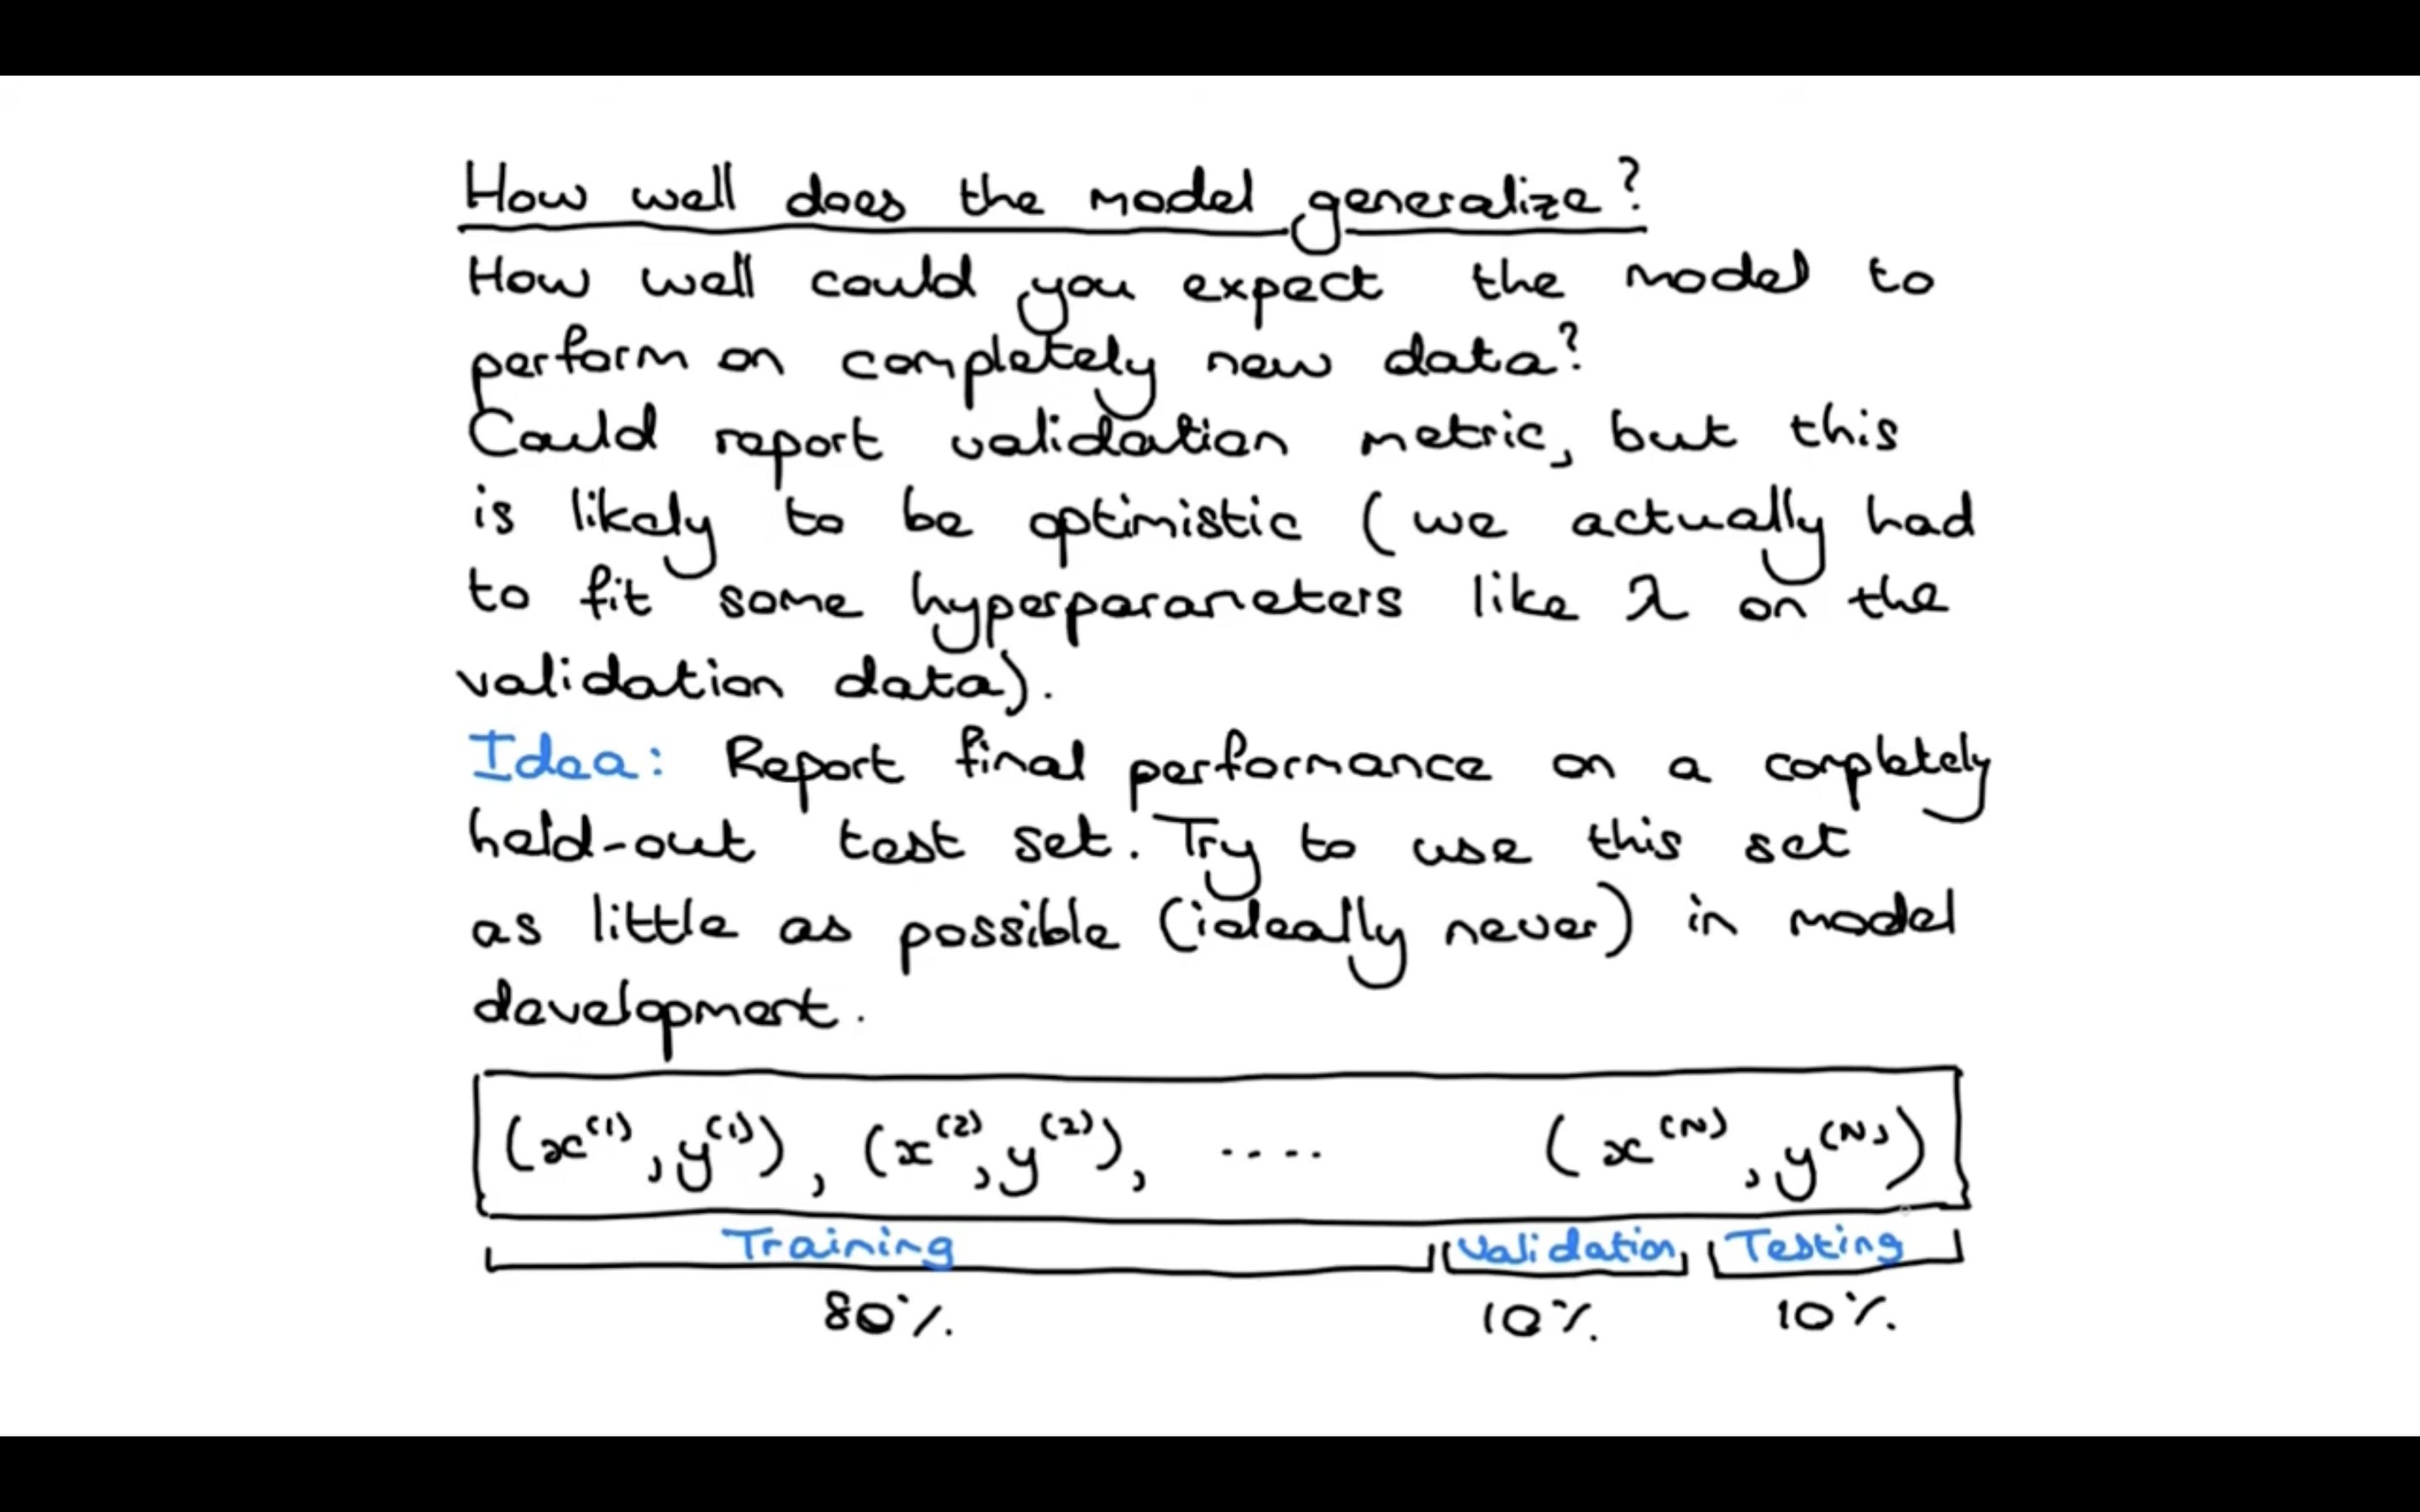

In [6]:
from IPython.display import Image
Image("./tvd.png")


### Proposed split options:
1. __Split the training, validation and test sets by ARU location ID.__
    This will have the advantage of making sure that the recordings all come from different locations, and so the model will not be overfit to the specifics of a particular location.
    <br>
2. __Split the training, validation and test sets by geographic area.__
    This will have the advantage of making sure that the recordings all come from different geographic regions, and so we may get an idea of how the model will generalize to other regions outside of the training area.<br>
3. __Randomly shuffle all the data and split into training, validation and test sets.__ This is the simplest method and will be used as a baseline.<br>
4. There are many more ways to split the data, by __date of recording__ we would get an idea of how the model performs on recent time windows, which could be relevant if the environmental noise or another factor is changing over time. 
If any of these options are chosen, the final use case of the model should be considered, in order to make sure that the final report is relevant to the use case.

|

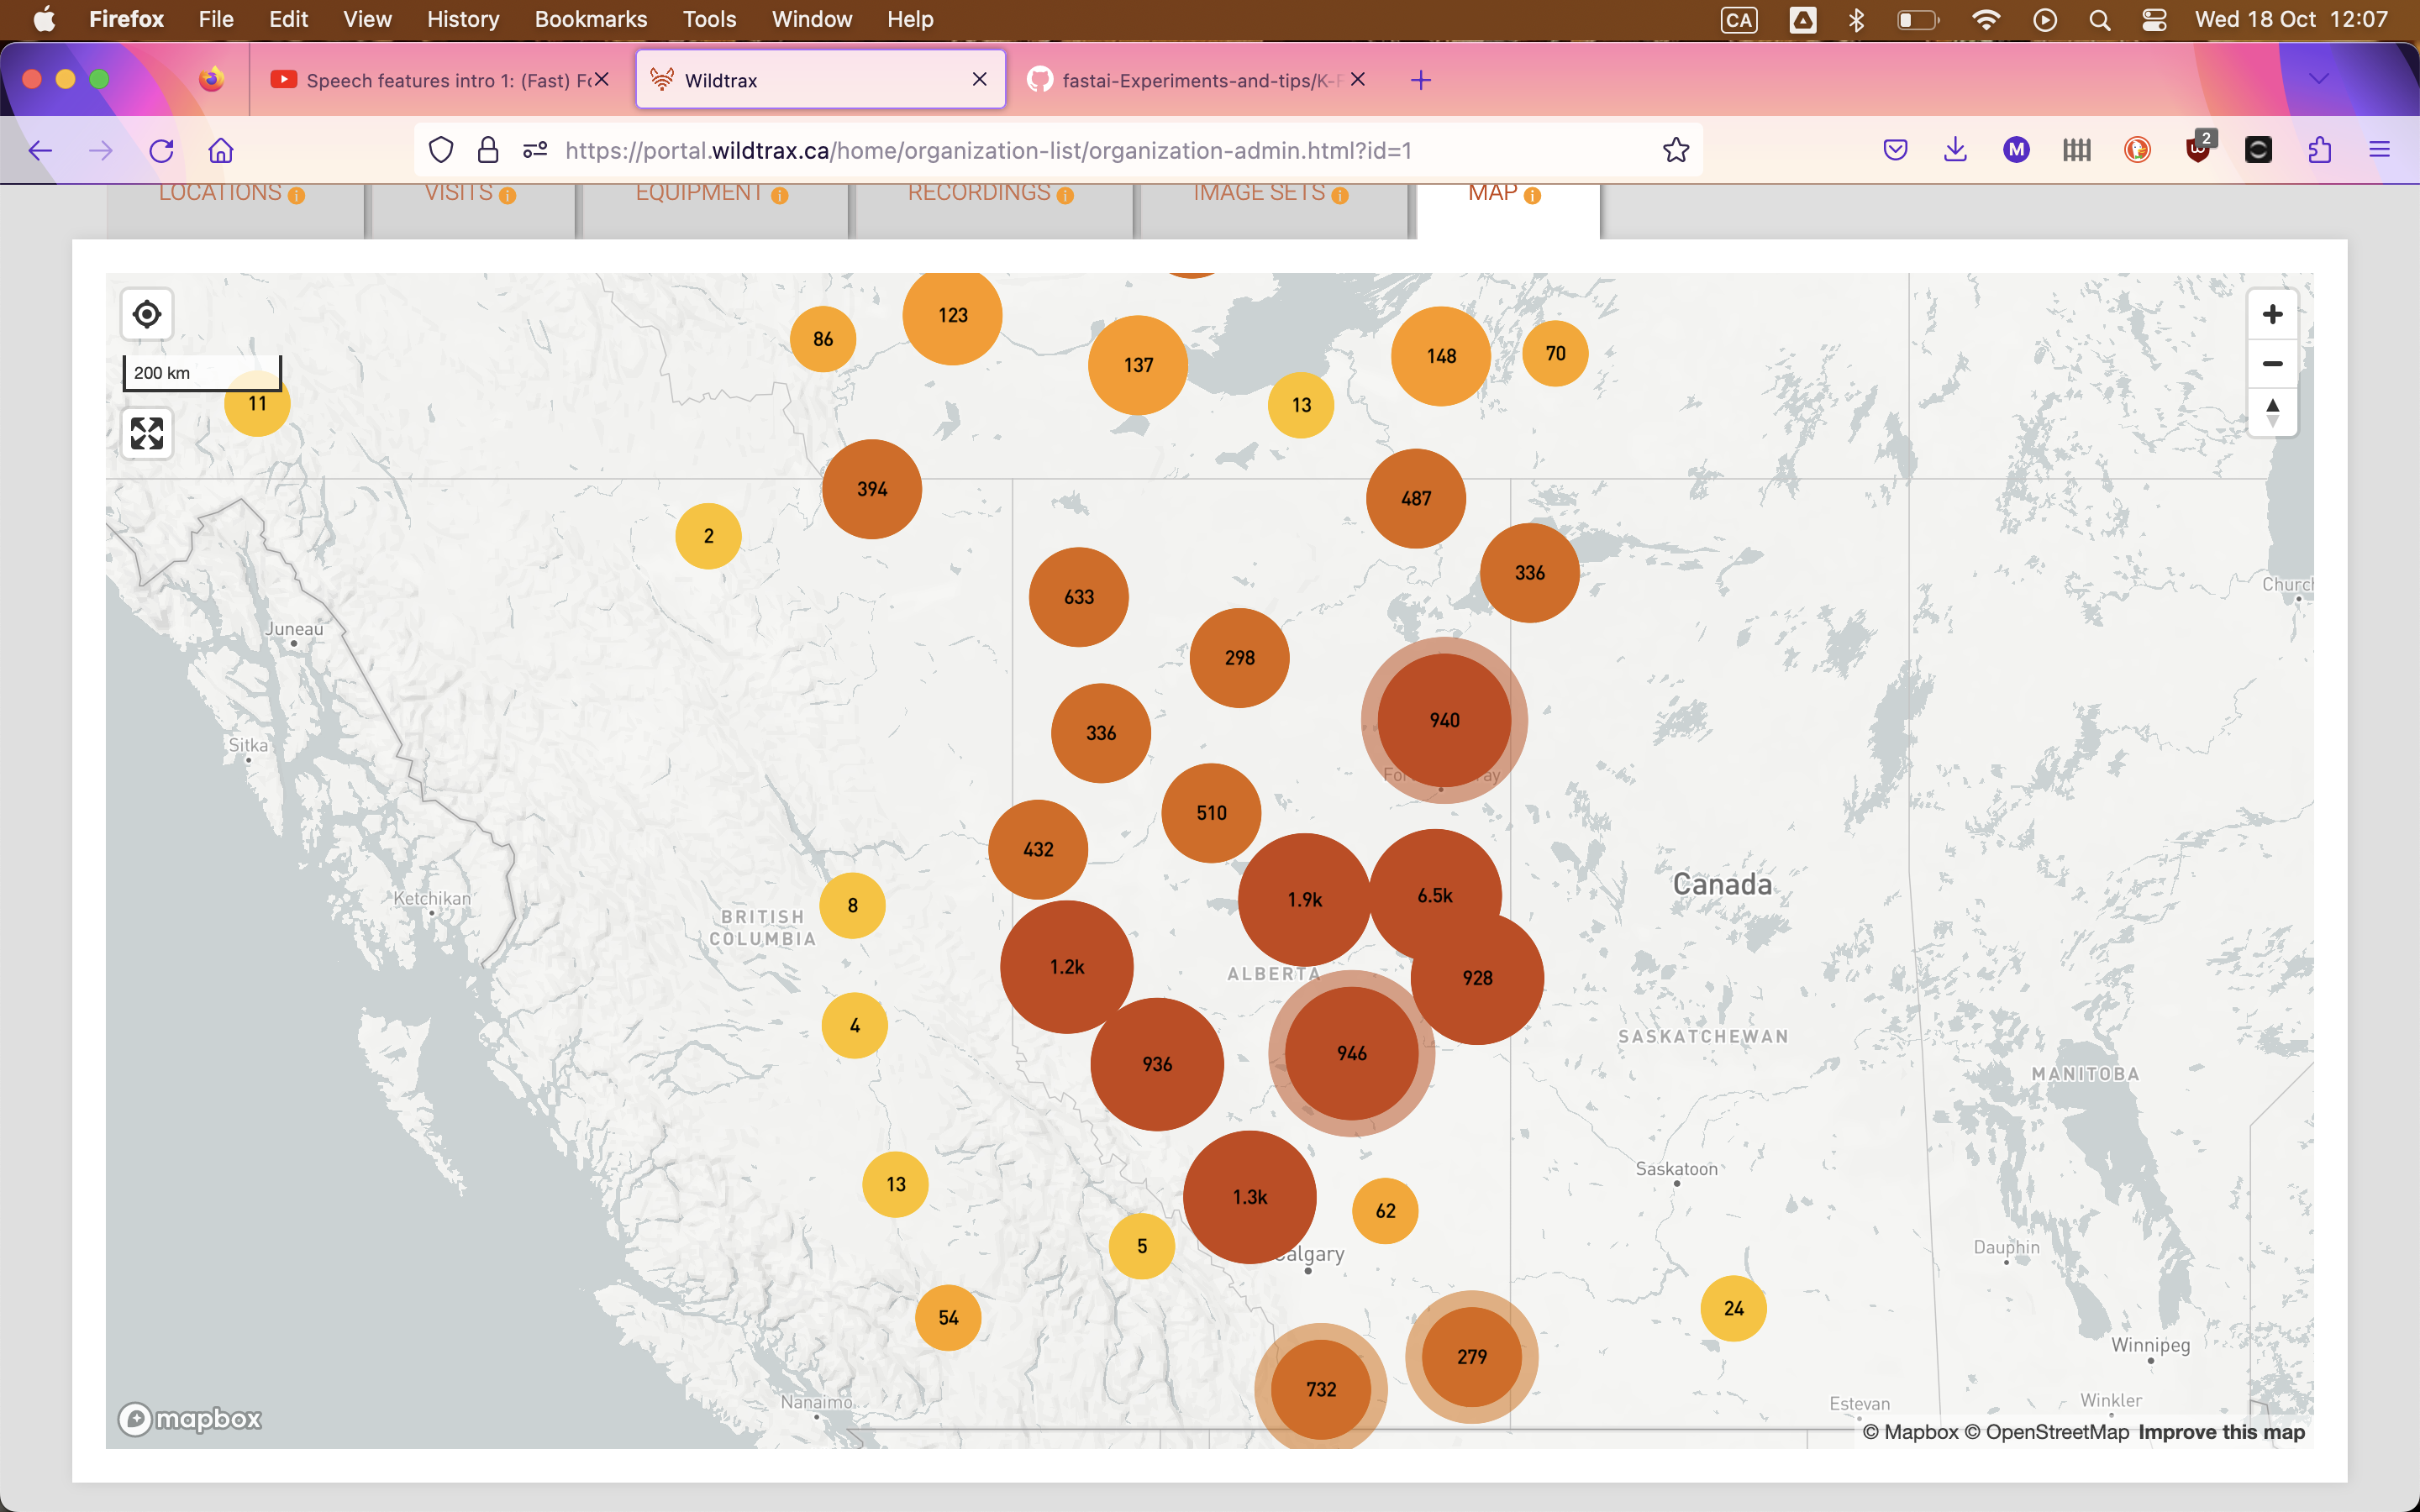

In [9]:
Image("./map.png")


### There will be three or four categories of data to consider:
1. Audio samples containing an olive sided flycatcher call:
This is relatively simple since we have a list of clips that contain the call in the training csv file. <br>

2. Audio samples of birds which are not the olive sided flycatcer:
This is also simple, since we have a list of tags for other bird species, but there is no guaruntee that there isn't an olive sided flycatcher in the background of one of these tags. 

3. What's the process for making a recording file? Are the recording ID's the same files which come off the ARU? Are they split into smaller chunks on the ARU and if so are these given different IDs or the same ID? 

These first two sets of data can be used to train an initial model by treating set 1 as calls, and set 2 as no-calls, but there is prior knowledge embedded in the training data: that a bird call is present in the recording. 


To make a no-call dataset, Elly proposed that I shoule aggregate by recording and pull negative data out of recordings that don't have OSFL in them.

    1. How can I be sure that people were listening for olives sided flycatchers in these recordings without osfl tags?
    2. make sure these recordings are from osfl habitat, and from projects which were looking for olive sided flycatchers.


To make a true 'no-call' data set, another step is proposed: take into account the tagging method used on WildTrax. There are two or three which I'm aware of:

- '1SPT' (one sample per time interval)
- '1SPM' (one sample per minute)
- no restrictions' (all of the vocalizations in the recording are tagged)


With this information, a recording ID, and the start and end time of an olive sided flycatcher clip, I can extract audio segments from before the first OSFL tag in a recording, and from segments of audio from between 60s, 120s (+n*60) and the start of an OSFL tag made within each minute.

A second source of true no-call could come from the recordings tagged with the 'no restrictions' tagging method, where there are no restrictions on the number of tags per recording. This could provide another denser source of true no-call data, but unfortunately the .csv file doesn't contain a label for 'no restrictions'. It may be that they were exported with the label 'None' instead but this is not clear.

These clips will have the advantage of containing periods of quiet, and the types of background noise associated with olive sided flycatcher habitat. 









### Questions to answer:

1. Having done some listening tagging in the past, is it an ok assumption that the audio between the time interval and the first tag is a 'no-call'? Or do people wait for a few calls then tag the call only once they're certain it was a species call?

2. Do you need the model to work on projects in areas from outside of the training area? Or do you want it to work on similar future projects in the same areas as the training data? Or both? This will affect my decsion of how to split the test data from the training data. I'm asking because the majority of the training data seems to come from Alberta. It might be worth looking for more data sources within BC.

3. I've been calling the vocalizations 'calls' rather than 'songs' - just realised.

4. 


# Section B - Data exploration

In [12]:
import pandas as pd
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [13]:
data_path = Path("../../data/")
df = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')

### After the filtering operations performed in clean_csv.py, how many OSFL positive tags remain?

In [19]:
sum(df.species_code == 'OSFL')

5184

The distribution of osfl detections per project is shown below:

In [20]:
df.loc[df['species_code'] == 'OSFL'].project.value_counts()

project
CWS-Ontario Birds of James Bay Lowlands 2021                     1752
CWS-Ontario Boreal Shield-Lowlands Transition 2022               1101
Boreal Wetland Community Monitoring                               698
Bayne-OSFL-BU-AnyYr 2021                                          301
Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021      139
Lebeuf-Taylor - 2023 RETN                                         137
Big Grids                                                         125
Retention                                                          75
CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)            75
Lebeuf-Taylor - 2021 RETN                                          71
Bioacoustic Unit Digital Point Counts                              57
CWS-Ontario Lake Superior NMCA 2021                                55
CWS-Ontario Incidental Atlas ARUs - 2022                           51
Natural Disturbance Long-term Monitoring Program 2016              46
Lebeuf-Taylo

# 1.  CWS-Ontario Birds of James Bay Lowlands 2021  
# 1101 samples
From wildtrax:
This is a public project. 
There were 8836 completed tasks and 188 resamples. 

What does resample mean? Could these be duplicates? If so these will need filtering out of the database. 

The 8836 dataset doesn't show up on the map - only the 188 resamples




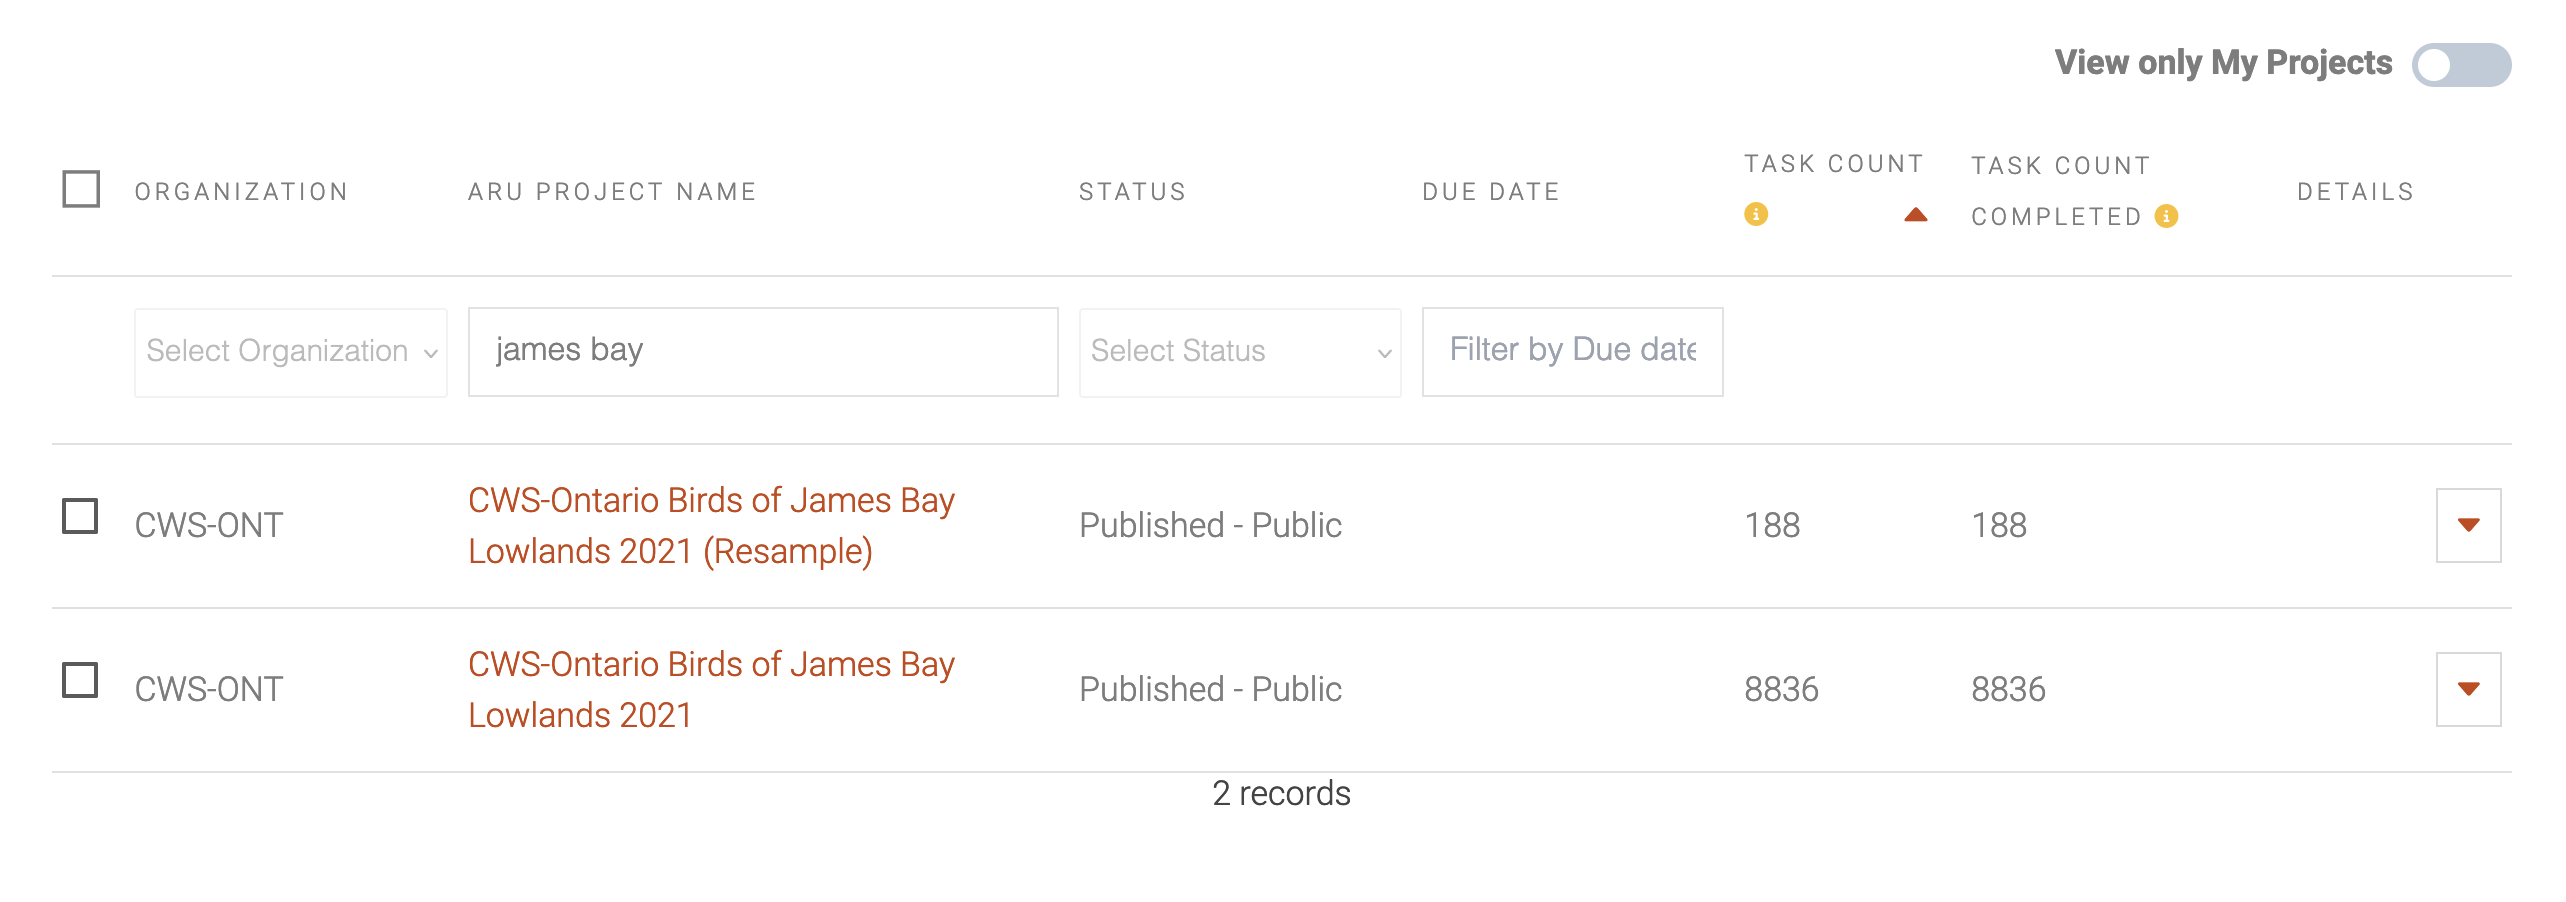

In [18]:
Image('./jamesbay.png')

These are collected in Ontario. 

We might want to prefer recordings collected in BC or Alberta if these are closer to the final use case.

# 2. CWS-Ontario Boreal Shield-Lowlands Transition 2022               
### 1101 samples - from 172 ARU locations in Ontario



# 3. Boreal wetlands community monitoring 
   This is a long-term project that monitors wetlands across northern Alberta.
   698 osfl tags from this project across E - NE alberta. 
   

# 4. Bayne-OSFL-BU-AnyYr 2021 
- 301 oslf clips 
- contains calls from yukon and NW territories
- __details__:           OSFL - 4 visits to Emily sites.  Day 135 to 196. Hours 0 to 23 

# 5. Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021
135 osfl clips from 698 recording locations all across Alberta

 __Details:__ Comparison project of occupancy and rate-of-use between residual legacy patches as single or aggregate of trees and clear-cut areas in harvest sites. Target species are Brown Creeper,Ruby-Crowned Kinglet, Olive-sided Flycatcher, Red-Eyed Vireo, Tennessee Warbler, and Yellow-Rumped Warbled (Myrtle). Each call or song for these species is tagged in 1 minute recordings. A 'none' tag is added if none of the target species are detected.
The audio data was obtained by the Bioacoustic Unit in both conifer and deciduous forests throughout Alberta during the 2021 breeding season.
Processing is ongoing by Isabelle Lebeuf-Taylor for her Master's thesis at the University of Alberta. Show Less

Note: Recordings from this 'none' tag can be used as no-call data. 